# USING SKLEARN

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [22]:
iris = sns.load_dataset('iris')

In [23]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [24]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [25]:
iris.shape

(150, 5)

## converting species to 0,1,2  - Label Encoding

In [26]:
le = LabelEncoder()

In [27]:
iris.species=le.fit_transform(iris.species)

In [28]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [30]:
X=iris.drop('species',axis=1)   #petal length and petal width as features
y=iris.species

In [32]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1,stratify = y)

#### stratify=y returns equal proportion of labels for both train and test as that of input dataset

In [41]:
print('Label counts in y: ',np.bincount(y))

Label counts in y:  [50 50 50]


In [42]:
print('Label counts in y_train: ',np.bincount(y_train))

Label counts in y_train:  [35 35 35]


In [45]:
print('Label counts in y_test: ',np.bincount(y_test))

Label counts in y_test:  [15 15 15]


## STANDARDIZATION

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Histogram of features before standardiation

(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

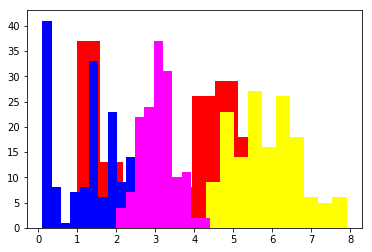

In [70]:
import matplotlib.pyplot as plt
plt.hist(iris.petal_length,color='red')
plt.hist(iris.petal_width,color='blue')
plt.hist(iris.sepal_length,color='yellow')
plt.hist(iris.sepal_width,color='magenta')

## Hence standardization is necessary

## Histogram of features after Standardization

(array([30.,  5.,  0.,  5., 16., 13.,  4., 15.,  7., 10.]),
 array([-1.43838721, -1.12374001, -0.80909281, -0.4944456 , -0.1797984 ,
         0.1348488 ,  0.449496  ,  0.76414321,  1.07879041,  1.39343761,
         1.70808482]),
 <a list of 10 Patch objects>)

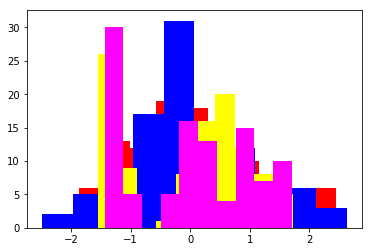

In [69]:
import matplotlib.pyplot as plt
plt.hist(X_train_std[:,0],color='red')
plt.hist(X_train_std[:,1],color='blue')
plt.hist(X_train_std[:,2],color='yellow')
plt.hist(X_train_std[:,3],color='magenta')

# LOGISTIC REGRESSION 

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lr = LogisticRegression(C=100.0, random_state=1)

In [58]:
lr.fit(X_train_std, y_train)

C:\Users\PRAMOD\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PRAMOD\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
lr.score(X_test_std,y_test)

0.9777777777777777

## Descision Tree

In [89]:

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tree.fit(X_train_std, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [90]:
tree.score(X_test_std,y_test)

0.9777777777777777

In [93]:
y_pred=tree.predict(X_test_std)

In [94]:
accuracy_score(y_test,y_pred)

0.9777777777777777

## Without max depth

In [95]:

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',random_state=1)
tree.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [96]:
tree.score(X_test_std,y_test)

0.9777777777777777

## max depth = 2

In [97]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=1)
tree.fit(X_train_std, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [98]:
tree.score(X_test_std,y_test)

0.9555555555555556

## Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
forest = RandomForestClassifier(criterion='entropy',n_estimators=25,random_state=1)

In [102]:
forest.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [104]:
forest.score(X_test_std,y_test)

0.9777777777777777

## KNN

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn = KNeighborsClassifier(n_neighbors=5,p=2)

In [107]:
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [109]:
knn.score(X_test_std,y_test)

0.9333333333333333